## Importing Libraries and reading dataset

In [10]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
#libraries for evaluation
from sklearn.metrics import mean_squared_log_error,r2_score,mean_squared_error
from sklearn.model_selection import train_test_split
#libraries for models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV,RidgeCV
from yellowbrick.regressor import AlphaSelection
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
import xgboost as xgb


In [11]:
from google.colab import files
upload=files.upload()

Saving car data.csv to car data.csv


In [12]:
ds = pd.read_csv('car data.csv')

In [13]:
ds.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


## Checking all the unique values

In [14]:
print(ds['Seller_Type'].unique())
print(ds['Transmission'].unique())
print(ds['Fuel_Type'].unique())
print(ds['Owner'].unique())

['Dealer' 'Individual']
['Manual' 'Automatic']
['Petrol' 'Diesel' 'CNG']
[0 1 3]


In [15]:
# Checking for Null Values
ds.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [16]:
ds.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


## Removing the 'Car_Name' feature beacuse it is useless

In [17]:
final_ds = ds[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

##  Creating own feature 'Car-Age' using the current year

In [18]:
x = datetime.datetime.now() # datetime var
current_year = x.year # current year
final_ds['Car_Age'] = current_year - final_ds['Year']

In [19]:
final_ds.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,9


In [20]:
final_ds.drop(['Year'],axis=1,inplace=True) # dropping year because of new feature car_age

In [21]:
final_ds.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,9


## Encoding Catagorical data

In [22]:
final_ds = pd.get_dummies(final_ds,drop_first=True)

In [23]:
final_ds.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,9,0,1,0,1
1,4.75,9.54,43000,0,10,1,0,0,1
2,7.25,9.85,6900,0,6,0,1,0,1
3,2.85,4.15,5200,0,12,0,1,0,1
4,4.60,6.87,42450,0,9,1,0,0,1


## Finding features with highest coeff value

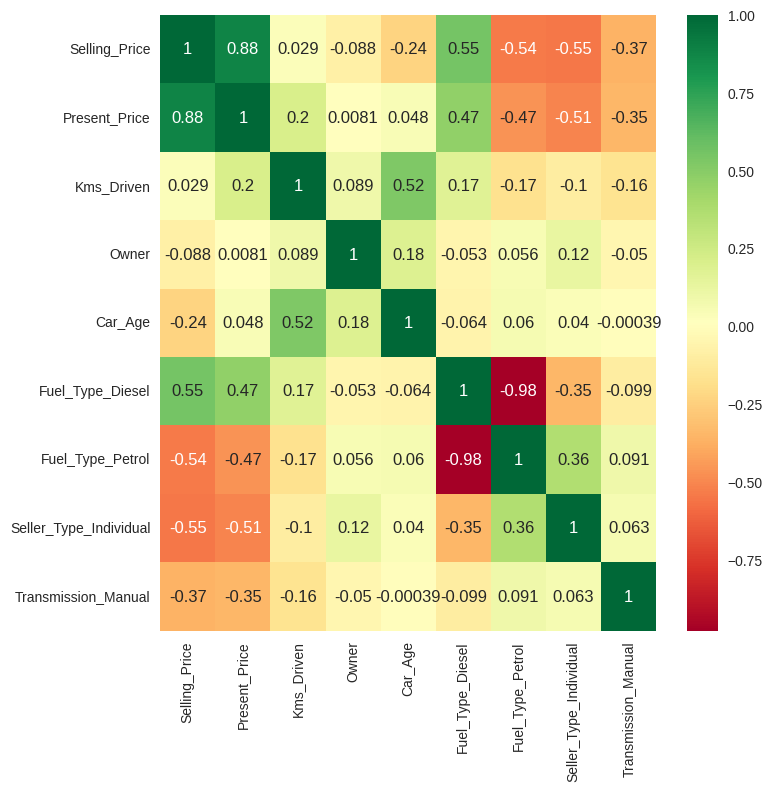

In [24]:
corrmat = final_ds.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(8,8))
g = sns.heatmap(final_ds[top_corr_features].corr(), annot = True,cmap="RdYlGn")

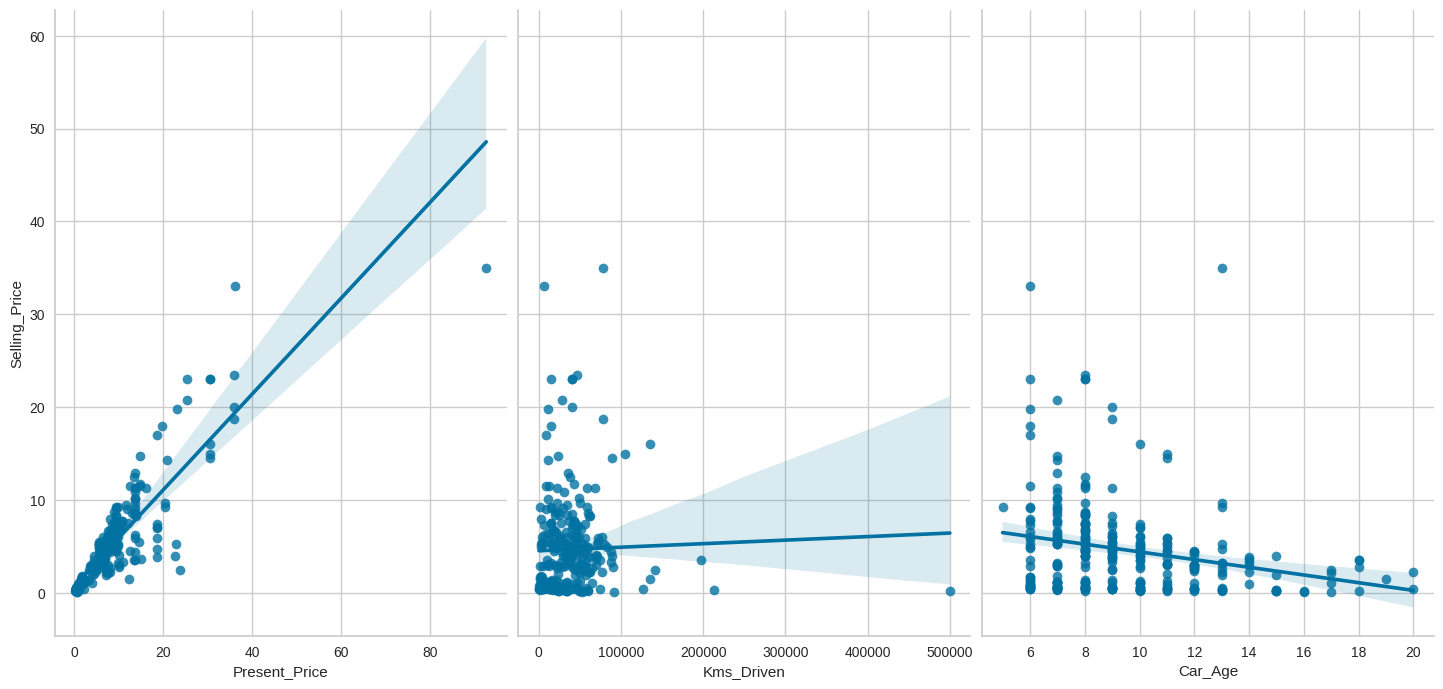

In [25]:
sns.pairplot(final_ds,x_vars=['Present_Price','Kms_Driven','Car_Age'],y_vars='Selling_Price',height = 7,aspect = 0.7,kind='reg')

In [26]:
X = final_ds.iloc[:,1:] #Independent features
y = final_ds.iloc[:,0] #Dependent feature

In [27]:
X.head()

,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,9,0,1,0,1
1,9.54,43000,0,10,1,0,0,1
2,9.85,6900,0,6,0,1,0,1
3,4.15,5200,0,12,0,1,0,1
4,6.87,42450,0,9,1,0,0,1


In [28]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

## Checking which features are important with a decision tree

In [29]:
from sklearn.ensemble import ExtraTreesRegressor
model =ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

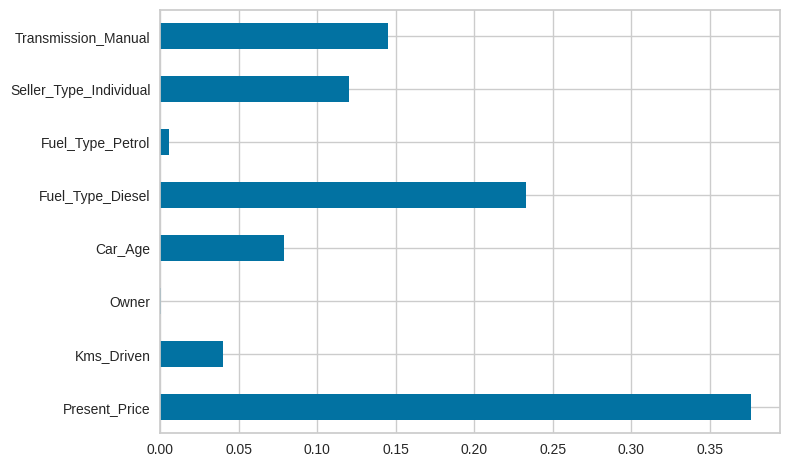

In [30]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.plot(kind='barh')
plt.show()

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

In [32]:
X_train.head()

,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
233,5.70,53000,0,10,1,0,0,1
121,1.50,6900,0,12,0,1,1,1
135,0.74,5000,0,8,0,1,1,1
138,0.87,15000,0,7,0,1,1,1
173,0.51,1300,0,6,0,1,1,0


LINEAR REGRESSION

In [33]:
LR=LinearRegression()
LR.fit(X_train,y_train)
y_pred=LR.predict(X_test)
print("MSE:",mean_squared_error(y_test, y_pred))
print("R2_score:",r2_score(y_test, y_pred))

MSE: 2.978284508880171
R2_score: 0.49642592960240817


Accuracy(%): 81.6

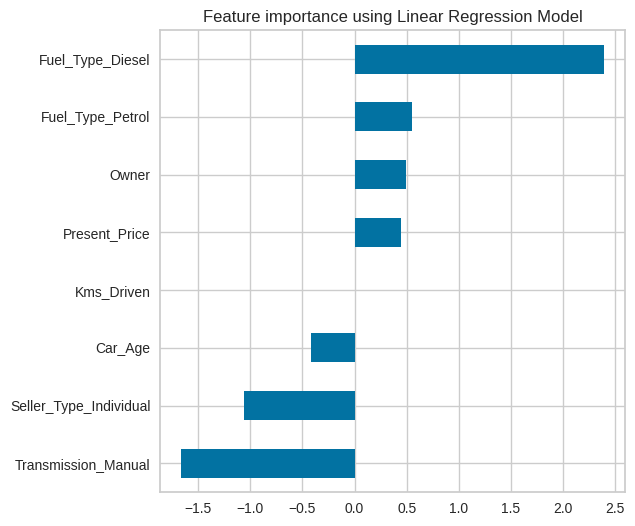

In [34]:
#Ploting feature importance graph

coef = pd.Series(LR.coef_, index = X_train.columns)
imp_coef = coef.sort_values()
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Linear Regression Model")
plt.savefig('Linear-Regression-Feature-Importance.jpg')
plt.show()

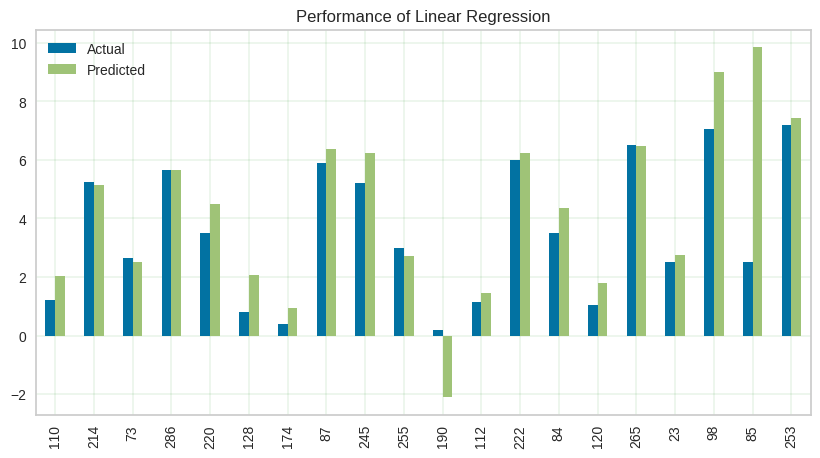

In [35]:
#Visualization of true value and predicted

df_check = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_check = df_check.sample(20)
df_check.plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.1', color='Green')
plt.title('Performance of Linear Regression')
plt.savefig('Linear-Regression-Performance')
plt.show()

Ridge Regression

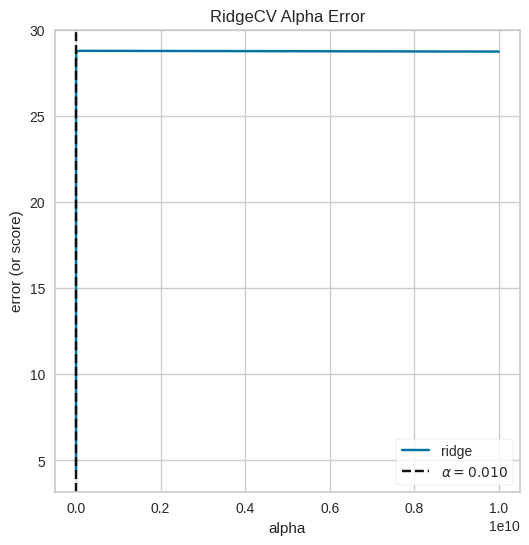

<Axes: title={'center': 'RidgeCV Alpha Error'}, xlabel='alpha', ylabel='error (or score)'>

In [36]:
alphas = 10**np.linspace(10,-2,400)
model = RidgeCV(alphas=alphas)
visualizer = AlphaSelection(model)
visualizer.fit(X_train,y_train)
visualizer.show()

In [37]:
RR=Ridge(alpha=20.336,solver='auto')
RR.fit(X_train,y_train)
y_pred=RR.predict(X_test)
print("MSE:",mean_squared_error(y_test, y_pred))
print("R2_score:",r2_score(y_test, y_pred))

MSE: 2.4647987621051253
R2_score: 0.5832470868235098


Accuracy(%): 81.2

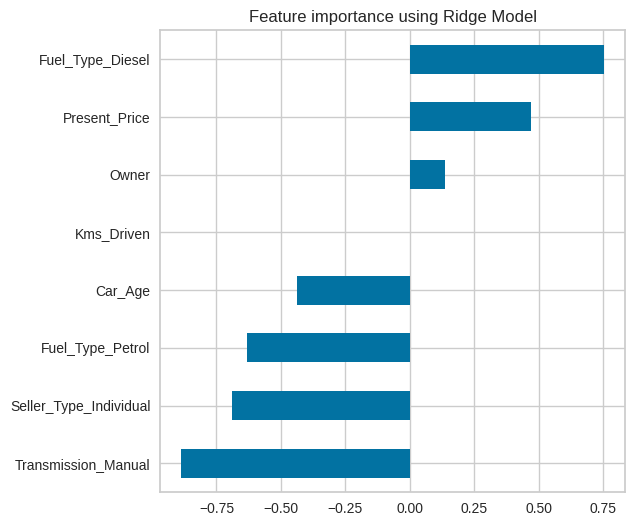

In [38]:
#Visualization of Feature Importance

coef = pd.Series(RR.coef_, index = X_train.columns)
imp_coef = coef.sort_values()
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Ridge Model")
plt.savefig('Ridge-Regression-Feature-Importance.jpg')
plt.show()

Lasso Regression

In [39]:
lasso=Lasso(alpha=0.0001)
lasso.fit(X_train,y_train)
y_pred=lasso.predict(X_test)
print("MSE:",mean_squared_error(y_test, y_pred))
print("R2_score:",r2_score(y_test, y_pred))

MSE: 2.974262632442868
R2_score: 0.49710595620232845


Accuracy(%): 81.6

KNN

In [40]:
R_MSE=[]
for i in range(1,10):
    KNN=KNeighborsRegressor(n_neighbors=i)
    KNN.fit(X_train,y_train)
    y_pred=KNN.predict(X_test)
    error=np.sqrt(mean_squared_error(y_test, y_pred))
    R_MSE.append(error)
    print("K =",i," , Root MSE =",error)

K = 1  , Root MSE = 2.5608825343694916
K = 2  , Root MSE = 3.2262390717966167
K = 3  , Root MSE = 4.289786110583134
K = 4  , Root MSE = 3.8395223734797552
K = 5  , Root MSE = 3.4727113698181884
K = 6  , Root MSE = 3.6560244875771057
K = 7  , Root MSE = 3.543078668561129
K = 8  , Root MSE = 3.4331063049678017
K = 9  , Root MSE = 3.6834968094895526


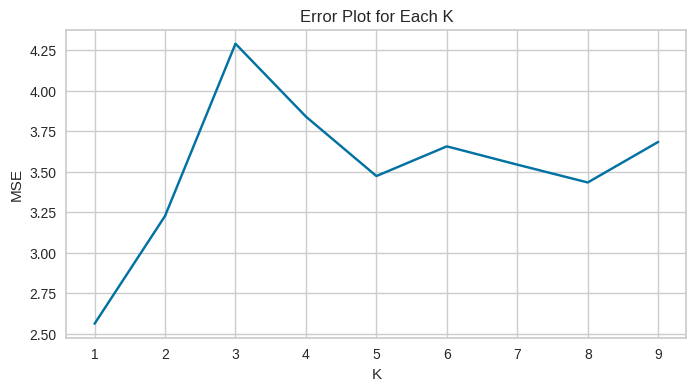

In [41]:
#plotting error

curve = pd.DataFrame(R_MSE) #elbow curve
plt.figure(figsize=(8,4))
plt.xticks(list(range(1,10)), list(range(1,10)), rotation='horizontal')
plt.plot(list(range(1,10)),R_MSE)
plt.xlabel('K')
plt.ylabel('MSE')
plt.title('Error Plot for Each K')
plt.savefig('KNN-Error-Plot.jpg')
plt.show()

In [42]:
#model implementation
KNN=KNeighborsRegressor(n_neighbors=5)
KNN.fit(X_train,y_train)
y_pred=KNN.predict(X_test)
print("MSE:",mean_squared_error(y_test, y_pred))
print("R2_score:",r2_score(y_test, y_pred))

MSE: 12.059724258064518
R2_score: -1.03908136190439


 a negative R squared means that the model is predicting worse than the mean of the target values. R2 will be negative when the line or curve does an awful job of fitting the data. Hence KNN model is not suitable for this dataset at all.

Random Forest

In [43]:
RFR = RandomForestRegressor(n_estimators=180,random_state=0, min_samples_leaf=1, max_features=0.5, n_jobs=-1, oob_score=True)
RFR.fit(X_train,y_train)
y_pred = RFR.predict(X_test)
print("MSE:",mean_squared_error(y_test, y_pred))
print(np.sqrt(mean_squared_error(y_test,y_pred)))
print("R2_score:",r2_score(y_test, y_pred))

MSE: 2.2166724724416635
1.488849378695395
R2_score: 0.6252007568929494


Accuracy(%): 87.7

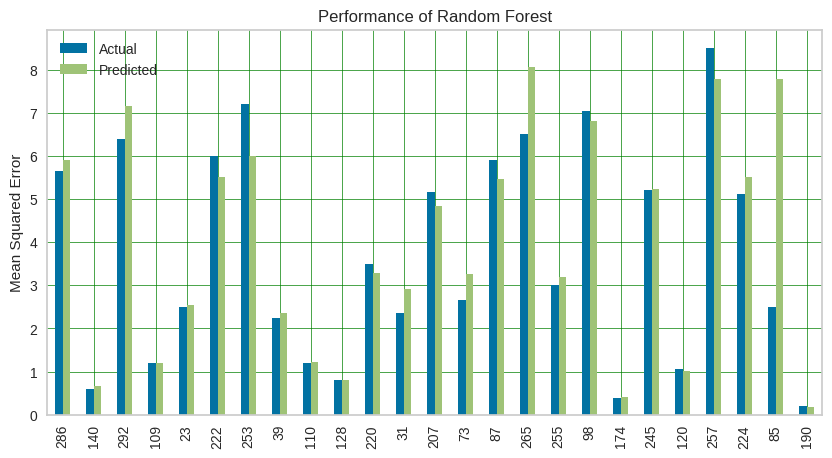

In [44]:
df_check = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_check = df_check.head(25)
#round(df_check,2)
df_check.plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.title('Performance of Random Forest')
plt.ylabel('Mean Squared Error')
plt.savefig('Random-Forest-Performance.jpg')
plt.show()

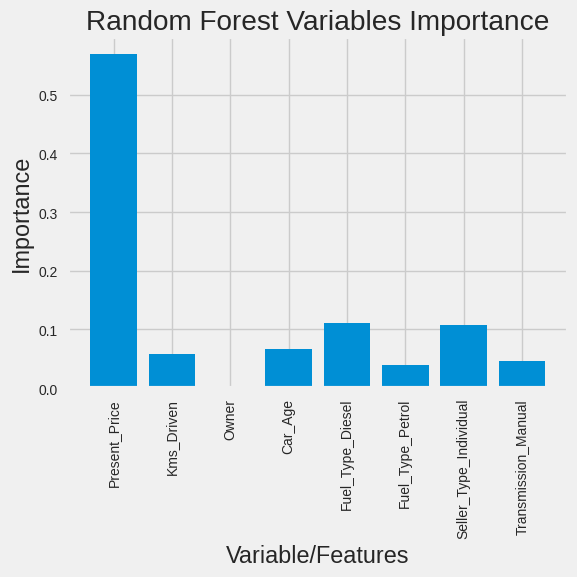

In [45]:
importances=RFR.feature_importances_
features=X_train.columns

# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.figure(figsize=(6,6))
plt.bar(x_values, importances, orientation = ('vertical'))
# Tick labels for x axis
plt.xticks(x_values, features, rotation=(90))
# Axis labels and title
plt.ylabel('Importance');
plt.xlabel('Variable/Features');
plt.title('Random Forest Variables Importance')
plt.tight_layout()
plt.savefig('Random-Forest-Variables-Importances.jpg',dpi=600)
plt.show();

Bagging Regressor

In [46]:
baggReg=BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=20),n_estimators=50, random_state=1,
                         max_samples=1.0, max_features=1.0, bootstrap=False,
                         bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=-1, verbose=0)
baggReg.fit(X_train,y_train)
y_pred=baggReg.predict(X_test)
print("MSE:",mean_squared_error(y_test, y_pred))
print(np.sqrt(mean_squared_error(y_test,y_pred)))
print("R2_score:",r2_score(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


MSE: 6.960421025806448
2.6382609851579217
R2_score: -0.17688136818206135


Accuracy(%): 88.8

AdaBoost

In [47]:
ABR = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=24),
    n_estimators=200,learning_rate=0.6
)

ABR.fit(X_train, y_train)
y_pred = ABR.predict(X_test)
print("MSE:",mean_squared_error(y_test, y_pred))
print(np.sqrt(mean_squared_error(y_test,y_pred)))
print("R2_score:",r2_score(y_test, y_pred))

MSE: 5.258587096774194
2.2931609400070885
R2_score: 0.1108679842482504


Accuracy(%): 88.9

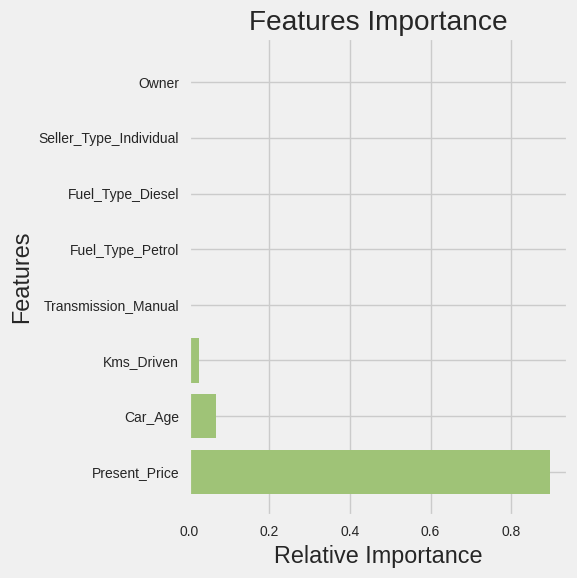

In [48]:
importances=ABR.feature_importances_
features=X_train.columns

indices = np.argsort(importances)
indices = [x for x in reversed(indices)]
plt.figure(1)
plt.title('Features Importance')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.savefig('Adaboost-Features-Importance2.jpg',dpi=60)
plt.show();

XGBoost

In [49]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', learning_rate = 0.4,
                max_depth = 24, alpha = 5, n_estimators = 200)
xg_reg.fit(X_train,y_train)
y_pred = xg_reg.predict(X_test)
print("MSE:",mean_squared_error(y_test, y_pred))
print(np.sqrt(mean_squared_error(y_test,y_pred)))
print("R2_score:",r2_score(y_test, y_pred))

MSE: 4.815672297344338
2.194464011403317
R2_score: 0.185756870022326


Accuracy(%): 87.5

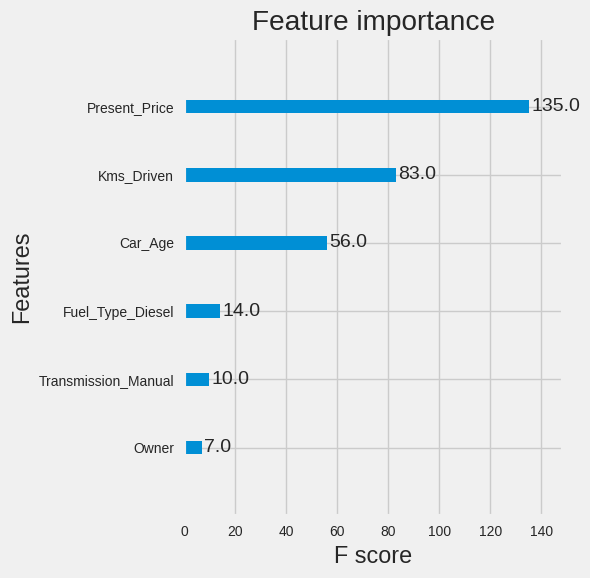

In [50]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.tight_layout()
plt.savefig('XGBoost-Features-Importance.jpg')
plt.show();

As we can see the model which performed the best for this dataset is AdaBoost with 88.9% accuracy. Hence this model can be save and used for prediction.